In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

### Load dataset

In [3]:
zoo= pd.read_csv("C:\\Users\\hp\\Desktop\\EXCELR\\EXCELR\\KNN\\Zoo.csv")
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [5]:
Zoo= zoo.drop(['animal name'], axis=1)

In [7]:
Zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hair      101 non-null    int64
 1   feathers  101 non-null    int64
 2   eggs      101 non-null    int64
 3   milk      101 non-null    int64
 4   airborne  101 non-null    int64
 5   aquatic   101 non-null    int64
 6   predator  101 non-null    int64
 7   toothed   101 non-null    int64
 8   backbone  101 non-null    int64
 9   breathes  101 non-null    int64
 10  venomous  101 non-null    int64
 11  fins      101 non-null    int64
 12  legs      101 non-null    int64
 13  tail      101 non-null    int64
 14  domestic  101 non-null    int64
 15  catsize   101 non-null    int64
 16  type      101 non-null    int64
dtypes: int64(17)
memory usage: 13.5 KB


In [9]:
Zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [11]:
X = Zoo.iloc[:, 0:16]
Y = Zoo.iloc[:, 16]

In [13]:
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [15]:
Y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

### Visualization

In [17]:
from bioinfokit.visuz import cluster
from sklearn.manifold import TSNE

X1 = TSNE(n_components=2).fit_transform(X)
cluster.tsneplot(score= X1)
pd.DataFrame(X1)

,0,1
0,182.024948,-79.969795
1,85.039581,-177.023270
2,-122.101097,204.169373
3,153.031784,-54.808205
4,126.284836,-114.025383
...,...,...
96,-69.305931,-23.375687
97,342.584015,-33.090595
98,126.284836,-114.025383
99,-30.377081,185.716339


In [19]:
data= pd.concat([pd.DataFrame(X1,columns=['Feature1','Feature2']), Zoo[['type']]], axis = 1)

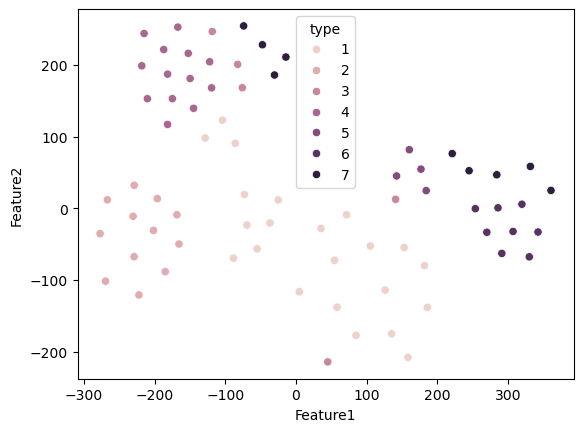

In [21]:
sns.scatterplot(data= data,x='Feature1',y='Feature2',hue='type')
plt.show()

<Axes: >

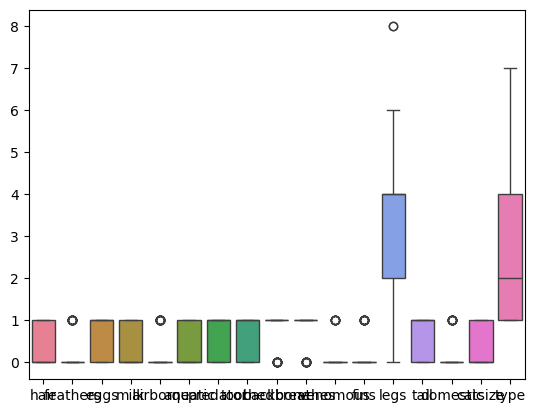

In [23]:
sns.boxplot(Zoo)

Since the interquartile range (IQR) is zero in the columns containing outliers, indicating no variability in these features, there is no meaningful basis for removing or replacing the outliers. Consequently, I will retain the outliers as they are, given that the overall data forms a single cohesive group.

### Standardization

In [25]:
def get_standardized(x):
    return ((x-x.mean())/x.std())

In [27]:
stand_x= get_standardized(X)
stand_x

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.155631,-0.494438,-1.179344,1.203713,-0.555520,-0.740515,0.891973,0.805758,0.463379,0.509805,-0.291839,-0.447635,0.569698,-1.689987,-0.382446,1.132532
1,1.155631,-0.494438,-1.179344,1.203713,-0.555520,-0.740515,-1.110010,0.805758,0.463379,0.509805,-0.291839,-0.447635,0.569698,0.585862,-0.382446,1.132532
2,-0.856761,-0.494438,0.839533,-0.822537,-0.555520,1.337041,0.891973,0.805758,0.463379,-1.942114,-0.291839,2.211844,-1.397465,0.585862,-0.382446,-0.874235
3,1.155631,-0.494438,-1.179344,1.203713,-0.555520,-0.740515,0.891973,0.805758,0.463379,0.509805,-0.291839,-0.447635,0.569698,-1.689987,-0.382446,1.132532
4,1.155631,-0.494438,-1.179344,1.203713,-0.555520,-0.740515,0.891973,0.805758,0.463379,0.509805,-0.291839,-0.447635,0.569698,0.585862,-0.382446,1.132532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.155631,-0.494438,-1.179344,1.203713,-0.555520,-0.740515,-1.110010,0.805758,0.463379,0.509805,-0.291839,-0.447635,-0.413883,0.585862,-0.382446,1.132532
97,1.155631,-0.494438,0.839533,-0.822537,1.782293,-0.740515,-1.110010,-1.228780,-2.136693,0.509805,3.392624,-0.447635,1.553280,-1.689987,-0.382446,-0.874235
98,1.155631,-0.494438,-1.179344,1.203713,-0.555520,-0.740515,0.891973,0.805758,0.463379,0.509805,-0.291839,-0.447635,0.569698,0.585862,-0.382446,1.132532
99,-0.856761,-0.494438,0.839533,-0.822537,-0.555520,-0.740515,-1.110010,-1.228780,-2.136693,0.509805,-0.291839,-0.447635,-1.397465,-1.689987,-0.382446,-0.874235


### Split dataset

In [29]:
x_train, x_test,y_train,y_test = train_test_split(stand_x,Y, test_size=0.2,random_state= 7)

In [31]:
print(x_train.shape,y_train.shape, x_test.shape, y_test.shape)

(80, 16) (80,) (21, 16) (21,)


### Implement KNN algorithm

In [33]:
model = KNeighborsClassifier(n_neighbors=3,metric= 'euclidean')
model.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [35]:
y_pred_train=model.predict(x_train)
y_pred_train

array([4, 1, 7, 1, 1, 6, 6, 1, 6, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 3, 2, 4,
       2, 2, 1, 3, 1, 1, 3, 1, 1, 2, 7, 1, 1, 7, 2, 1, 1, 3, 1, 7, 1, 4,
       3, 4, 1, 4, 7, 2, 6, 2, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 4, 1, 7, 6,
       4, 6, 5, 6, 2, 7, 2, 4, 2, 2, 1, 5, 1, 1], dtype=int64)

In [37]:
y_pred_test= model.predict(x_test)
y_pred_test

array([2, 5, 2, 1, 1, 7, 1, 2, 4, 1, 7, 6, 3, 4, 6, 1, 2, 1, 2, 4, 1],
      dtype=int64)

In [39]:
print(classification_report(y_train,model.predict(x_train)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00         2
           6       0.86      1.00      0.92         6
           7       1.00      0.88      0.93         8

    accuracy                           0.99        80
   macro avg       0.98      0.98      0.98        80
weighted avg       0.99      0.99      0.99        80



In [43]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         5
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         3
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.95        21
   macro avg       0.86      0.79      0.81        21
weighted avg       1.00      0.95      0.97        21



C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Set up GridsearchCV

In [45]:
param_grid = {
    'n_neighbors': list(range(1, 21)),  # Range of K values to test
    'weights': ['uniform', 'distance'],  # Weighting options
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithms to use
    'metric': ['euclidean', 'manhattan']  # Test different distance metrics
}

In [49]:
import warnings
warnings.filterwarnings('ignore')
knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [51]:
print('Best parameters:', grid_search.best_params_)
print('Best cross-validation score:', grid_search.best_score_)

Best parameters: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
Best cross-validation score: 0.9743589743589745


### Best model

In [53]:
best_knn= KNeighborsClassifier(n_neighbors=1, metric= 'euclidean', algorithm= 'auto', weights= 'uniform')
best_knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [55]:
y_pred_train= best_knn.predict(x_train)
y_pred_train

array([4, 1, 7, 1, 1, 6, 6, 1, 6, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 3, 2, 4,
       2, 2, 1, 3, 1, 1, 3, 1, 1, 2, 7, 1, 1, 7, 2, 1, 1, 3, 1, 7, 1, 4,
       3, 4, 1, 4, 7, 2, 6, 2, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 4, 1, 7, 6,
       4, 6, 5, 7, 2, 7, 2, 4, 2, 2, 1, 5, 1, 1], dtype=int64)

In [57]:
y_pred_test=best_knn.predict(x_test)
y_pred_test

array([2, 3, 2, 1, 1, 7, 1, 2, 4, 1, 7, 6, 3, 4, 6, 1, 2, 1, 2, 4, 1],
      dtype=int64)

In [59]:
print(classification_report(y_train,best_knn.predict(x_train)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         8

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [61]:
warnings.filterwarnings('ignore')
print(classification_report(y_test,best_knn.predict(x_test)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         5
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         3
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.90        21
   macro avg       0.71      0.71      0.71        21
weighted avg       0.90      0.90      0.90        21



### Best K value for dataset

In [63]:
import warnings
warnings.filterwarnings('ignore')

# range of k we want to try
k_range = range(1, 10)
# empty list to store scores
k_scores = []

for k in k_range:
    
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

pd.Series(k_scores).sort_values(ascending=False)

0    0.970000
2    0.930000
1    0.920000
3    0.900476
4    0.850952
5    0.850952
6    0.841429
7    0.801429
8    0.791905
dtype: float64

### Dropping in accuracy with increase in K

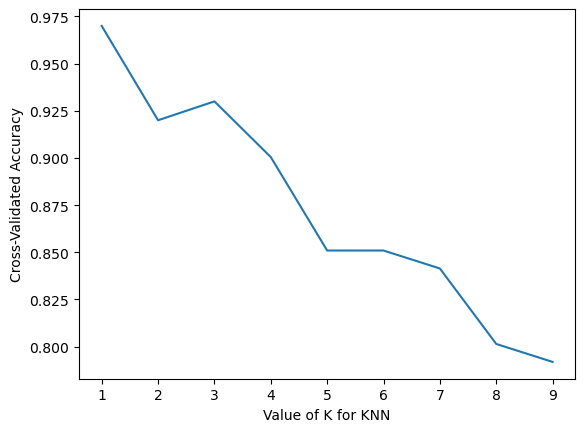

In [65]:
k_range = range(1, 10)
k_scores = []

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())

# plot to see clearly
plt.plot(k_range, k_scores)


plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

### Interview question

##### 1. What are the key hyperparameters in KNN?

K-Nearest Neighbors (KNN) has several key hyperparameters:

1. ***n_neighbors:*** Specifies the number of nearest neighbors to consider for classification or regression.
2. ***weights:*** Determines how neighbors are weighted, either equally ('uniform') or based on distance ('distance').
3. ***algorithm:*** Chooses the method for finding neighbors ('auto', 'ball_tree', 'kd_tree', 'brute').
4. ***p:*** Controls the distance metric, with p=2 for Euclidean distance and p=1 for Manhattan distance.
5. ***leaf_size:*** Affects the speed of tree-based algorithms by setting the leaf size in Ball Tree or KD Tree structures.

##### 2. What distance metrics can be used in KNN?

1. ***Euclidean Distance:*** Straight-line distance; common for continuous data.
2. ***Manhattan Distance:*** Sum of absolute differences; useful for grid-like paths.
3. ***Minkowski Distance:*** Generalization of Euclidean and Manhattan; controlled by parameter p.
4. ***Chebyshev Distance:*** Maximum absolute difference; considers the most significant dimension.
5. ***Hamming Distance:*** Measures differences in categorical data; counts mismatches.